# Crear una Red Neuronal en Python desde cero

## 1. El código de la Red Neuronal

In [1]:
import numpy as np

def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def sigmoid_derivada(x):
    return sigmoid(x)*(1.0-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivada(x):
    return 1.0-x**2

class NeuralNetwork:
    def __init__(self, layers, activation='tanh'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_derivada
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_derivada
        
        # Inicializo los pesos
        self.weights = []
        self.deltas = []
        # capas = [2, 3, 2]
        # rango de pesos varía entre (-1, 1)
        # asigno valores aleatorios a capa de entrada y capa oculta
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) - 1
            self.weights.append(r)
        # asigno aleatorios a capa de salida
        r = 2*np.random.random((layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)
    
    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        # Agrego columna de unos a las entradas X
        # Con esto agregamos la unidad de Bias a la capa de entrada
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)

        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                dot_value = np.dot(a[l], self.weights[l])
                activation = self.activation(dot_value)
                a.append(activation)
            # Calculo la diferencia en la capa de salida y el valor obtenido
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]

            # Empezamos en el segundo layer hasta el último
            # (Una capa anterior a la de salida)
            for l in range(len(a) - 2, 0, -1):
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))
            
            self.deltas.append(deltas)

            # invertir
            # [level3(output) -> level2(hidden)] => [level2(hidden)]
            deltas.reverse()

            # backpropagation
            # 1. Multiplicar los deltas de salida con las activaciones de entrada
            #    para obtener el gradiente del peso
            # 2. Actualizo el peso restándole un porcentaje del gradiente
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)
            
            if k % 10000 == 0:
                print('epochs:', k)
            
    def predict(self, x):
        ones = np.atleast_2d(np.ones(x.shape[0]))
        a = np.concatenate((np.ones(1).T, np.array(x)), axis=0)
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a
    
    def print_weights(self):
        print("LISTADO PESOS DE CONEXIONES")
        for i in range(len(self.weights)):
            print(self.weights[i])
    
    def get_deltas(self):
        return self.deltas

In [2]:
# Función "Coche evita obstáculos"
nn = NeuralNetwork([2, 3, 2], activation='tanh')
X = np.array([[0, 0],   # Sin obstáculos
              [0, 1],   # Sin obstáculos
              [0, -1],   # Sin obstáculos
              [0.5, 1],   # Obstáculo detectado a derecha
              [0.5, -1],   # Obstáculo detectado a izquierda
              [1, 1],   # Demasiado cerca a derecha
              [1, -1]])  # Demasiado cerca a izquierda

y = np.array([[0, 1],   # Avanzar
              [0, 1],   # Avanzar
              [0, 1],   # Avanzar
              [-1, 1],   # Giro izquierda
              [1, 1],   # Giro derecha
              [0, -1],   # Retroceder
              [0, -1]])  # Retroceder

nn.fit(X, y, learning_rate=0.03, epochs=15001)

index = 0
for e in X:
    print("X:", e, "y:", y[index], "Network:", nn.predict(e))
    index += 1

epochs: 0
epochs: 10000
X: [0. 0.] y: [0 1] Network: [-0.00644275  0.9999919 ]
X: [0. 1.] y: [0 1] Network: [1.60265669e-05 9.99930792e-01]
X: [ 0. -1.] y: [0 1] Network: [0.0030282 0.9999887]
X: [0.5 1. ] y: [-1  1] Network: [-0.95530821  0.94986449]
X: [ 0.5 -1. ] y: [1 1] Network: [0.94632402 0.96050992]
X: [1. 1.] y: [ 0 -1] Network: [-0.00498127 -0.96056161]
X: [ 1. -1.] y: [ 0 -1] Network: [ 0.00642664 -0.98285345]


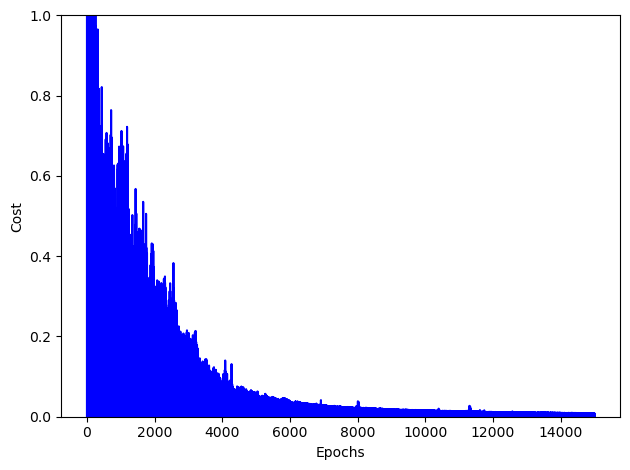

In [3]:
import matplotlib.pyplot as plt

deltas = nn.get_deltas()
valores = []
index = 0
for arreglo in deltas:
    valores.append(arreglo[1][0] + arreglo[1][1])
    index += 1

plt.plot(range(len(valores)), valores, color='b')
plt.ylim([0, 1])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()